In [7]:
!wget 'https://raw.githubusercontent.com/keitabroadwater/gnns_in_action/master/chapter_2/relationships_hashed.json'
!ls

--2023-03-24 10:11:08--  https://raw.githubusercontent.com/keitabroadwater/gnns_in_action/master/chapter_2/relationships_hashed.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 963530 (941K) [text/plain]
Saving to: ‘relationships_hashed.json’

relationships_hashe 100%[===================>] 940.95K  --.-KB/s    in 0.06s   

2023-03-24 10:11:08 (15.5 MB/s) - ‘relationships_hashed.json’ saved [963530/963530]

relationships_hashed.json  sample_data


In [70]:
import json
with open('relationships_hashed.json', 'rb') as file:
    json_data = json.load(file)

print(json_data)

{'b39ae65ebc89363c9dce2fd3ff73f58191cb8947': ['20e53a53a9875ce3c1beeac367c52699f69772ef'], '131e840479c73b6835c1a97872a436972fc142e5': ['b49b6a8f89d07370949d1eb1a19240f40398b7f8'], 'ad63f970d01947ce1b2a9a14c92103c4252a0e86': ['03e4c9e8593fd47ca6df56bb56b3d5993da24ab4', '4e3f27e72fb1a9b24a4b183e70ab7caeb95f6522', 'c79602b11d0c05a52f7617fbf21ed27cb2ef21f1', 'a35b358605ac639e00243d74ad98f4be7df5367d', '6a14914bf66aa8c04e4b8261b148667218e469e4', '5f31e4dbea313306f94be96c19433ae95d400159', '8f3320fcb044b0f80725d22ad15752a6a46e1c8d'], '90876ef6ad4269c9457e5e13ffc394964a0ea82a': ['84c716209d8e221d02203ec7f2cb25262721d640', '0921a7bde167696c7b64b6003ce018b09aa25648', '97d1726f12a6f1d4a67e46e9251bb857f1d8df32', '367711fd450ffdc1d40a4c52ccd3ac8a6f328cec', '14c7f7385db605fb8d1c311fe3f6cb804846bce7', '88347bdc9840aa83311597b00fc61af8b7431d2c', '04155f5683c54e39da3e3488ecfa81f1d2ec36ca', '0c8b68342376a6a84c1792b9cf800271fb6e3e3a', '255001cd008ae5d819538706ff9072becf12b226'], 'e85d8407f953ab30e70bfc

In [16]:
json_data[list(json_data.keys())[0]]

['20e53a53a9875ce3c1beeac367c52699f69772ef']

In [76]:
import timeit
#Creating adjacency list from json file
#This function has been modified from the book's function to improve efficiency
def create_adjacency_list(data_dict, suffix=''):
    node_list = set()
    for source_node in list(data_dict.keys()):
        node_list.add(source_node)

    for x in data_dict[source_node]:
        node_list.add(x)
        if x not in data_dict.keys():
            data_dict[x] = [source_node]
        else:
            if source_node not in data_dict[x]:
                data_dict[x].append(source_node)
    g= open("adjacency_list_{}.txt".format(suffix),"w+")
    for source_node in list(data_dict.keys()):
        dt = ' '.join(data_dict[source_node])
        g.write("{} {} \n".format(source_node, dt))
        g.close
    return node_list

In [77]:
#Timing our improved function
%%timeit -r 4
create_adjacency_list(json_data)
None

9.14 ms ± 1.3 ms per loop (mean ± std. dev. of 4 runs, 100 loops each)


In [32]:
#Source function from book
def create_adjacency_list2(data_dict, suffix=''):

    list_of_nodes = []
    for source_node in list(data_dict.keys()): #A
        if source_node not in list_of_nodes:
            list_of_nodes.append(source_node)
        for y in data_dict[source_node]: #B
            if y not in list_of_nodes: #B
                list_of_nodes.append(y) #B
            if y not in data_dict.keys(): #B
                data_dict[y]=[source_node] #B
            else: #B
                if source_node not in data_dict[y]: #B
                    data_dict[y].append(source_node) #B
                else: continue #B
    g= open("adjacency_list_{}.txt".format(suffix),"w+") #C
    for source_node in list(data_dict.keys()): #D
        dt = ' '.join(data_dict[source_node]) #E
        g.write("{} {} \n".format(source_node, dt)) #G
        g.close
    return list_of_nodes

In [33]:
%%timeit -r 4
create_adjacency_list2(json_data)
None

339 ms ± 14.2 ms per loop (mean ± std. dev. of 4 runs, 1 loop each)


The modified version is 38x faster

In [39]:
#Optimized function
def create_edge_list(data_dict, suffix=''):
    edge_list_file = open("edge_list_{}.txt".format(suffix),"w+")
    list_of_edges = set()
    list_of_nodes = set()

    for source_node in list(data_dict.keys()):
        list_of_nodes.add(source_node)
        connections = data_dict[source_node]

        for destination_node in connections:
            list_of_nodes.add(destination_node)
            _tmp = len(list_of_edges)
            list_of_edges.add((source_node, destination_node))
            if len(list_of_edges) != _tmp:
                edge_list_file.write("{} {}".format(source_node, destination_node))
        edge_list_file.close
    return list_of_edges, list_of_nodes

In [40]:
#Optimized function (slight variation)
def create_edge_list2(data_dict, suffix=''):
    edge_list_file = open("edge_list_{}.txt".format(suffix),"w+")
    list_of_edges = set()
    list_of_nodes = set()

    for source_node in list(data_dict.keys()):
        list_of_nodes.add(source_node)
        connections = data_dict[source_node]

        for destination_node in connections:
            list_of_nodes.add(destination_node)
            if (source_node, destination_node) not in list_of_edges:
                edge_list_file.write("{} {} \n".format(source_node, destination_node))
                list_of_edges.add((source_node, destination_node))
    edge_list_file.close
    return list_of_edges, list_of_nodes

In [47]:
#Function from the book
def create_edge_list3(data_dict, suffix=''):
    edge_list_file = open("edge_list_{}.txt".format(suffix),"w+")
    list_of_edges = []
    list_of_nodes_all = []
    for source_node in list(data_dict.keys()):
        if source_node not in list_of_nodes_all:
            list_of_nodes_all.append(source_node)
            list_of_connects = data_dict[source_node]
        for destination_node in list_of_connects: #A
            if destination_node not in list_of_nodes_all:
                list_of_nodes_all.append(destination_node)
            if {source_node, destination_node} not in list_of_edges:
                edge_list_file.write("{} {} \n".format(source_node, destination_node)) #C
                list_of_edges.append({source_node, destination_node})
            else: continue
    edge_list_file.close
    return list_of_edges, list_of_nodes_all

In [52]:
%%timeit -r 4 -n 1000
create_edge_list(json_data)
None

42.6 ms ± 307 µs per loop (mean ± std. dev. of 4 runs, 1000 loops each)


In [53]:
%%timeit -r 4 -n 1000
create_edge_list2(json_data)
None

41 ms ± 320 µs per loop (mean ± std. dev. of 4 runs, 1000 loops each)


In [48]:
%%timeit -r 4
create_edge_list3(json_data)
None

1.79 s ± 441 ms per loop (mean ± std. dev. of 4 runs, 1 loop each)


Our second optimized function speeds up calculation by 41x.

## Data Loading 

In [54]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
import networkx as nx
import pandas as pd
import numpy as np

In [78]:
create_adjacency_list2(json_data)
social_graph = nx.read_adjlist('adjacency_list_.txt')
social_graph

In [57]:
!wget 'https://raw.githubusercontent.com/keitabroadwater/gnns_in_action/master/chapter_2/node_attributes_hashed.csv'

--2023-03-24 13:12:59--  https://raw.githubusercontent.com/keitabroadwater/gnns_in_action/master/chapter_2/node_attributes_hashed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155173 (152K) [text/plain]
Saving to: ‘node_attributes_hashed.csv’

node_attributes_has 100%[===================>] 151.54K  --.-KB/s    in 0.03s   

2023-03-24 13:12:59 (5.40 MB/s) - ‘node_attributes_hashed.csv’ saved [155173/155173]



In [61]:
node_attr = pd.read_csv('node_attributes_hashed.csv')
node_attr

,position_type,company_type,hashedid,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,engineer,tech,058b92d6c47c4f8e29b302b30a1fff4a21ba9d36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,executive_or_management,finance,e943ba6d3c0eb8589df32a873ab5772c8f77c68f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,marketing_sales,Unknown,07722a6692fb28485ddaf84979322fb5a78d0926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,marketing_sales,Unknown,eb319e0714095bc9f9517317e9040f125b8de8d4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,misc,misc,acddbb2edb475d3a5fd127075dc146eb9ba94e0e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,misc,misc,d2d878318aaa8825d9e0e43b162ae0b33a9a90ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,executive_or_management,nonprofit_ngo,3e0a9701ee6796753d601a8d9ba551fec1e9b8d3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1944,education,education,dbfb54497fe275982736b278a69ac0d6554469d0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1945,misc,tech,ef0a4531dbc7fd4b16765ea67bbbac66c496f392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
node_attr = node_attr[["position_type","company_type","hashedid"]]
node_attr.head()

,position_type,company_type,hashedid
0,engineer,tech,058b92d6c47c4f8e29b302b30a1fff4a21ba9d36
1,executive_or_management,finance,e943ba6d3c0eb8589df32a873ab5772c8f77c68f
2,marketing_sales,Unknown,07722a6692fb28485ddaf84979322fb5a78d0926
3,marketing_sales,Unknown,eb319e0714095bc9f9517317e9040f125b8de8d4
4,misc,misc,acddbb2edb475d3a5fd127075dc146eb9ba94e0e


In [67]:
node_attr.set_index('hashedid', inplace=True)
node_attributes = node_attr.to_dict(orient='index')
print(node_attributes)

{'058b92d6c47c4f8e29b302b30a1fff4a21ba9d36': {'position_type': 'engineer', 'company_type': 'tech'}, 'e943ba6d3c0eb8589df32a873ab5772c8f77c68f': {'position_type': 'executive_or_management', 'company_type': 'finance'}, '07722a6692fb28485ddaf84979322fb5a78d0926': {'position_type': 'marketing_sales', 'company_type': 'Unknown'}, 'eb319e0714095bc9f9517317e9040f125b8de8d4': {'position_type': 'marketing_sales', 'company_type': 'Unknown'}, 'acddbb2edb475d3a5fd127075dc146eb9ba94e0e': {'position_type': 'misc', 'company_type': 'misc'}, 'bd4783a20926f4486e97351c3cc30b764c532482': {'position_type': 'misc', 'company_type': 'misc'}, 'dc01dcef18ba7b6eb477d0cb2950ac40469ec3f9': {'position_type': 'marketing_sales', 'company_type': 'supplychain_manufacturing'}, 'cb2508a49cae4dd2b0c2d7895ed90342690afebe': {'position_type': 'executive_or_management', 'company_type': 'finance'}, 'd4aea40e1a87586350a1bafa25f20aab746bab69': {'position_type': 'engineer', 'company_type': 'tech'}, '540e55ee5ebbd9b72719df9ec9a3348

In [79]:
#Setting node attributes
nx.set_node_attributes(social_graph, node_attributes)
print(social_graph.number_of_nodes(), social_graph.number_of_edges())

1933 12239


In [85]:
len([c for c in nx.connected_components(social_graph)])

219

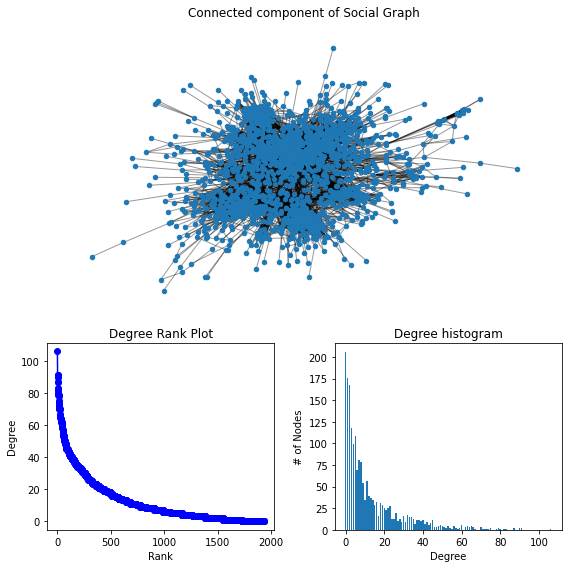

In [87]:
import matplotlib.pyplot as plt

## Modified from NetworkX documentation.
fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)
ax0 = fig.add_subplot(axgrid[0:3, :])
# ‘Gcc’ stands for ‘graph connected component’
Gcc = social_graph.subgraph(sorted(nx.connected_components(social_graph), key=len,
reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected component of Social Graph")
ax0.set_axis_off()
degree_sequence = sorted([d for n, d in social_graph.degree()], reverse=True)
ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")
ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")
fig.tight_layout()
plt.show()

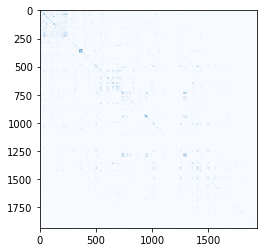

In [90]:
#Adjacency matrix of our graph
plt.imshow(nx.to_numpy_array(social_graph), aspect='equal',cmap='Blues')
plt.show()